# Assignment Ch. 5 - Computer Vision [Case #1]
Startup Campus, Indonesia - `Artificial Intelligence Track`
* Dataset: -
* Libraries: Scikit-image, OpenCV, Numpy, Matplotlib
* Objective: Digital Image Processing

`PREREQUISITE` All modules (with their suitable versions) are installed properly.
<br>`TASK` Complete the notebook cell's code marked with <b>#TODO</b> comment.
<br>`TARGET PORTFOLIO` Students are able to replicate the image enhancement algorithm commonly (and recently) used in smartphone companies.
<br>`WARNING` Do **NOT CHANGE** any codes within the User-defined Functions (UDFs) section.

### Case Study Description
As of July 2023, both Apple and Samsung lead the smartphone industry worldwide, with a combined 52.61% of the total market share [(ref1)](https://www.oberlo.com/statistics/smartphone-market-share). As the main feature that must be present on today's smartphones, Apple and Samsung are competing to create camera technology so you can capture your best photo even in the low light condition.
- In September 2019, Apple introduced **Deep Fusion** technology (via the iPhone 11 series) to tackle the challenge. Its upgrade, named **Photonic Engine**, was introduced in September 2022 via the new iPhone 14 series [(ref2)](https://www.youtube.com/watch?v=ux6zXguiqxM&t=4784s&ab_channel=Apple).
- In February 2023, Samsung introduced **Adaptive Tetra-squared Pixel Sensor** technology with the Samsung S23 series as a counter-solution to a similar problem, promising excellent bright photo results from dark-toned images [(ref3)](https://www.youtube.com/watch?v=gUM2wYKdxDA&t=742s&ab_channel=Samsung).

At its core, both technologies work by combining several adjacent pixels into a single pixel, using a **Max Pooling** operation. In this case, you are challenged to replicate the concept (brighten dark-toned photos), and then compare the result with another approach, i.e., **Contrast Limited Adaptive Histogram Equation (CLAHE)**.

[KLIK UNTUK TERJEMAHKAN TEKS](https://translate.google.com/?hl=id&ie=UTF-8&sl=en&tl=id&text=As%20of%20July%202023%2C%20both%20Apple%20and%20Samsung%20lead%20the%20smartphone%20industry%20worldwide%2C%20with%20a%20combined%2052.61%25%20of%20the%20total%20market%20share%20(ref1).%20As%20the%20main%20feature%20that%20must%20be%20present%20on%20today%27s%20smartphones%2C%20Apple%20and%20Samsung%20are%20competing%20to%20create%20camera%20technology%20so%20you%20can%20capture%20your%20best%20photo%20even%20in%20the%20low%20light%20condition.%0A%0A-%20In%20September%202019%2C%20Apple%20introduced%20Deep%20Fusion%20technology%20(via%20the%20iPhone%2011%20series)%20to%20tackle%20the%20challenge.%20Its%20upgrade%2C%20named%20Photonic%20Engine%2C%20was%20introduced%20in%20September%202022%20via%20the%20new%20iPhone%2014%20series%20(ref2).%0A%0A-%20In%20February%202023%2C%20Samsung%20introduced%20Adaptive%20Tetra-squared%20Pixel%20Sensor%20technology%20with%20the%20Samsung%20S23%20series%20as%20a%20counter-solution%20to%20a%20similar%20problem%2C%20promising%20excellent%20bright%20photo%20results%20from%20dark-toned%20images%20(ref3).%0A%0AAt%20its%20core%2C%20both%20technologies%20work%20by%20combining%20several%20adjacent%20pixels%20into%20a%20single%20pixel%2C%20using%20a%20Max%20Pooling%20operation.%20In%20this%20case%2C%20you%20are%20challenged%20to%20replicate%20the%20concept%20(brighten%20dark-toned%20photos)%2C%20and%20then%20compare%20the%20result%20with%20another%20approach%2C%20i.e.%2C%20Contrast%20Limited%20Adaptive%20Histogram%20Equation%20(CLAHE).&op=translate)

### Import libraries

In [18]:
import numpy as np, cv2
from skimage.io import imsave
from skimage.measure import block_reduce
from torch.nn import MaxPool2d
from torch import from_numpy
from matplotlib import pyplot as plt
from matplotlib.image import imread

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### User-defined Functions (UDFs)

In [20]:
def plot(
    imgs : list,
    titles : list = ["ORIGINAL", "EDITED"],
    figsize : tuple = (8, 5),
    cmaps : list = [None, None],
    *args, **kwargs
) -> None:

    if len(imgs) > 3:
        raise ValueError("Max. total image = 3.")

    if len(imgs) != len(titles):
        raise ValueError("'imgs' should be in the same length with 'titles'.")

    my_figure = plt.figure(figsize=figsize)
    # NOTE: figsize=(width/horizontally, height/vertically)

    fig_ids = [121, 122] if len(imgs) == 2 else [131, 132, 133]

    for idx, img, title, c in zip(fig_ids, imgs, titles, cmaps):
        m = my_figure.add_subplot(idx)
        plt.imshow(img, cmap=c)
        plt.axis("off")
        plt.title(title)

    plt.tight_layout()

In [21]:
def apply_clahe_rgb(img, clipLimit=2, tileGridSize=(10, 10)):
    # LAB color model where L = Lightness, a = green-red, b = blue-yellow
    light, a, b = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2LAB)) # convert to LAB color model
    light_clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=tileGridSize).apply(light) # apply CLAHE for lightness (L) component only
    return cv2.cvtColor(cv2.merge((light_clahe, a, b)), cv2.COLOR_LAB2BGR) # return with reconvert to BGR color model

### Load dataset
Do NOT forget to upload "photo1.jpeg" and "lena.png" to the Google Collab files.

In [30]:
img = imread("/content/drive/MyDrive/case01/photo1.jpeg")

In [23]:
lena = cv2.imread("/content/drive/MyDrive/case01/lena.png")

### Warm Up: Image processing (exploration using OpenCV)

* Color image -> Grayscale image

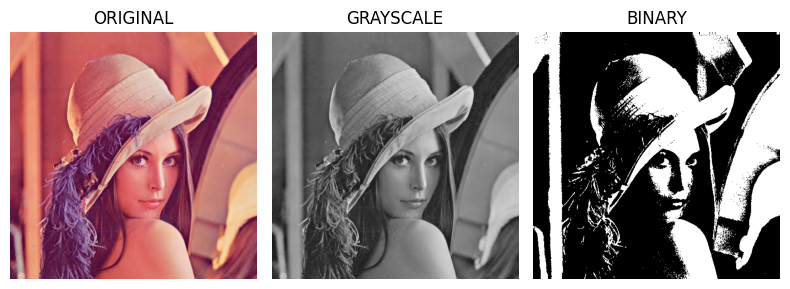

In [24]:
# original image
img_lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB) # TODO: Change the color channel from BGR to RGB using cv2.COLOR_BGR2RGB

# color image to grayscaled image
img_grayscaled = cv2.cvtColor(img_lena, cv2.COLOR_BGR2GRAY) # TODO: Change the color channel from BGR to Grayscale using cv2.COLOR_BGR2GRAY
img_grayscaled = cv2.cvtColor(img_grayscaled, cv2.COLOR_BGR2RGB)

# grayscaled image to binary image
_, img_binary = cv2.threshold(img_grayscaled, 128, 255, cv2.THRESH_BINARY) # TODO: Change the color channel from Grayscale to Binary using cv2.THRESH_BINARY

# plot both
plot(imgs=[img_lena, img_grayscaled, img_binary], titles=["ORIGINAL", "GRAYSCALE", "BINARY"], cmaps=[None, None, "gray"])

* Check their histograms

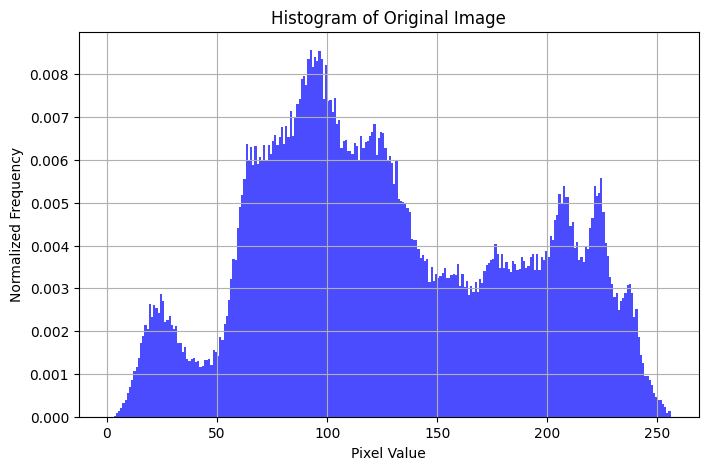

In [25]:
# TODO: Plot the histogram from the original image
# Plot histogram from the original image
plt.figure(figsize=(8, 5))
plt.hist(img_lena.ravel(), bins=256, range=(0, 256), density=True, color='b', alpha=0.7)
plt.xlabel('Pixel Value')
plt.ylabel('Normalized Frequency')
plt.title('Histogram of Original Image')
plt.grid()
plt.show()


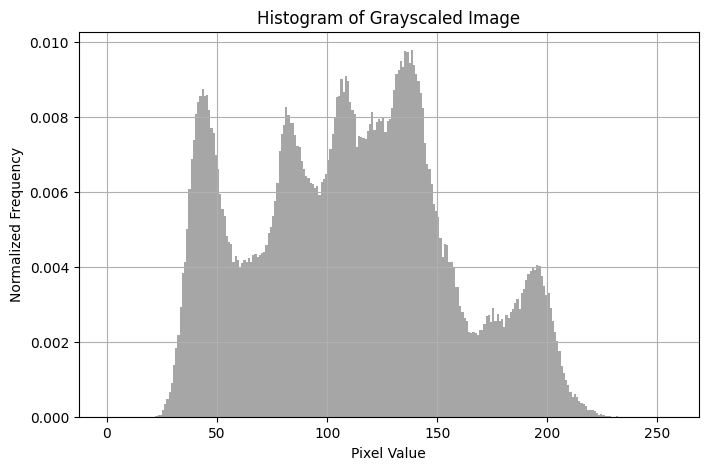

In [26]:
# TODO: Plot the histogram from the grayscaled image
hist, bins = np.histogram(img_grayscaled.ravel(), bins=256, range=(0, 256))

plt.figure(figsize=(8, 5))
plt.hist(img_grayscaled.ravel(), bins=256, range=(0, 256), density=True, color='gray', alpha=0.7)
plt.xlabel('Pixel Value')
plt.ylabel('Normalized Frequency')
plt.title('Histogram of Grayscaled Image')
plt.grid()
plt.show()


### Max Pooling (using Scikit-image)

In [27]:
BLOCK_SIZE = (5, 5, 1)

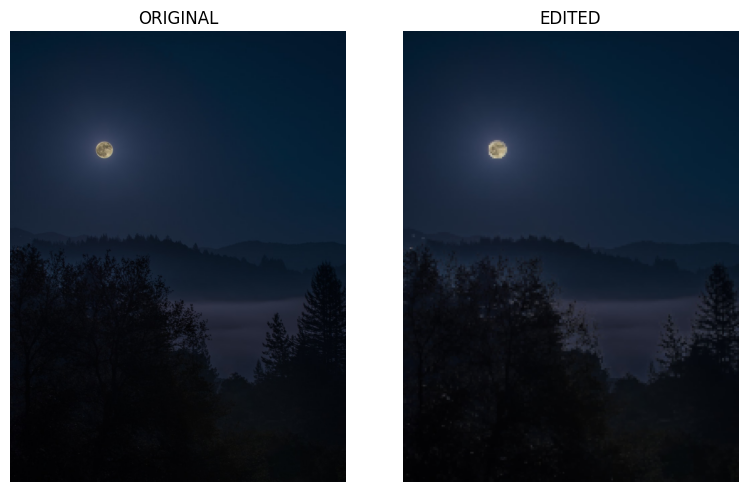

In [31]:
img_edited = block_reduce(img, block_size=BLOCK_SIZE, func=np.max)
plot(imgs=[img, img_edited])

### Max Pooling (using PyTorch)

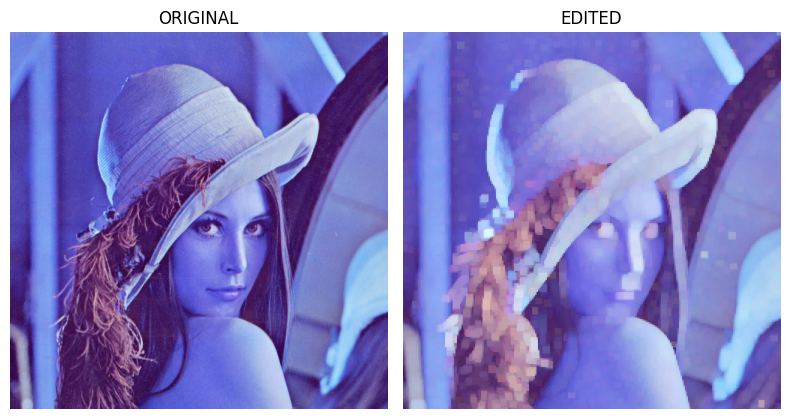

In [32]:
# convert numpy-based image to torch.Tensor type
img_torch = from_numpy(lena).permute(2, 0, 1).float()

# prepare Max Pooling operation from PyTorch
max_pooling = MaxPool2d(kernel_size=9, stride=2)

# perform Max Pooling operation
img_torch_edited = max_pooling(img_torch).permute(1, 2, 0).int().numpy()
plot(imgs=[lena, img_torch_edited])

In [12]:
# QUESTIONS
# TODO: What does PyTorch offer in its Max Pooling operation compared to Scikit-image?

[ ANSWER HERE ]

Hasil Max Pooling dengan pytorch dapat terlihat lebih "pecah" atau berdetail karena hanya nilai maksimum yang dipertahankan. Sedangkan hasil Max Pooling dengan scikit-learn dapat terlihat lebih "blur" atau terhaluskan. Ini karena scikit-learn mungkin menggunakan ukuran jendela pooling yang lebih besar atau pendekatan yang lebih tradisional untuk menghitung nilai maksimum dalam jendela yang lebih cocok untuk aplikasi pemrosesan gambar yang berorientasi pada analisis gambar daripada pengenalan objek atau tugas yang memerlukan detail tinggi.

### Min Pooling and Average Pooling

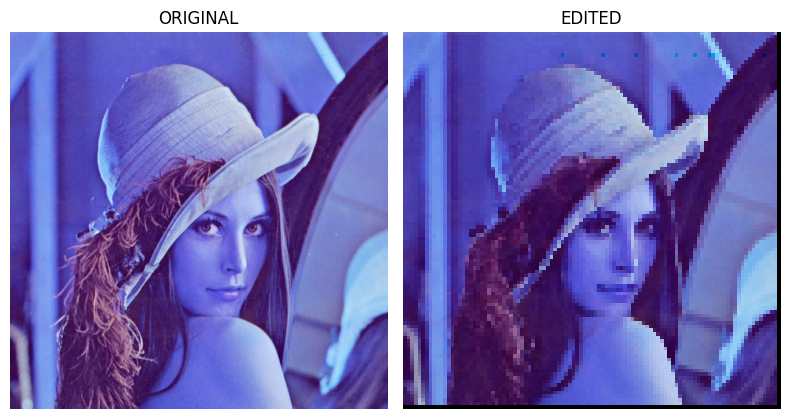

In [33]:
img_edited_min = block_reduce(lena, BLOCK_SIZE, func=np.min) # TODO: Recall the block_reduce(), but with func=np.min
plot(imgs=[lena, img_edited_min])

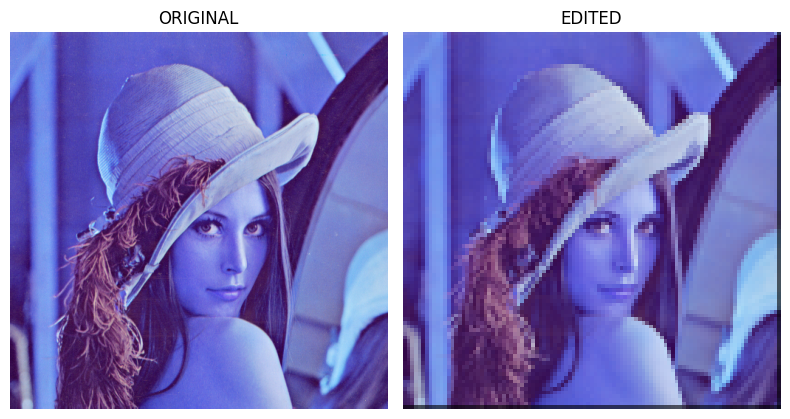

In [34]:
img_edited_avg = img_edited_avg = block_reduce(lena, BLOCK_SIZE, func=np.mean).astype(int) # TODO: Recall the block_reduce().astype(int), but with func=np.mean
plot(imgs=[lena, img_edited_avg])

In [15]:
# QUESTIONS
# TODO: What is the difference between Min Pooling and Average Pooling operations?
# If you cannot see the difference, try with another image or change the BLOCK_SIZE.

[ ANSWER HERE ]

Pada operasi Min Pooling, nilai piksel yang dihasilkan adalah nilai terkecil atau yang paling gelap dalam jendela pooling. Sehingga hasilnya gambar cenderung lebih gelap karena nilai minimum diambil dari setiap jendela. Oleh karena itu, gambar akan lebih peka terhadap piksel dengan nilai rendah. Sedangkan average pooling nilai piksel yang dihasilkan adalah nilai rata-rata dari semua piksel dalam jendela pooling. Hasilnya adalah gambar yang cenderung lebih terang karena nilai rata-rata diambil dari setiap jendela. Ini berarti bahwa intensitas cahaya cenderung dipertahankan atau dihaluskan dalam hasil Average Pooling.

### CLAHE
Now imagine you have a better approach to compete Apple's Photonic Engine and Samsung's Adaptive Tetra-squared Pixel technologies using **Contrast Limited Adaptive Histogram Equalization (CLAHE)**. How's the result?

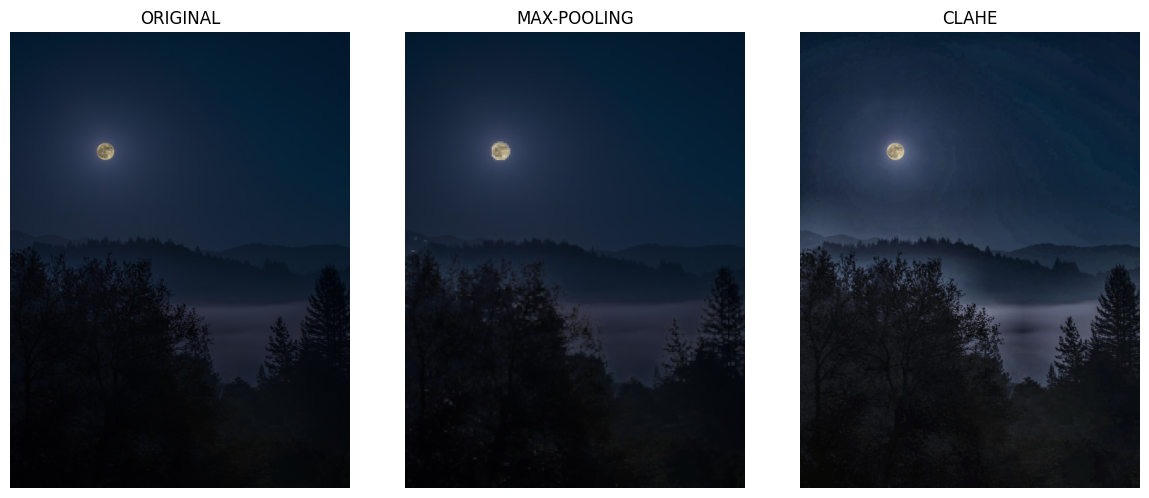

In [35]:
img_clahe = apply_clahe_rgb(img) # TODO: Call the function apply_clahe_rgb() and pass the variable image of "photo1.jpeg"
plot(imgs=[img, img_edited, img_clahe], titles=["ORIGINAL", "MAX-POOLING", "CLAHE"], figsize=(12, 5), cmaps=[None]*3)

In [17]:
# QUESTIONS
# TODO: What are the advantages of using CLAHE (instead of Max Pooling) to brighten the dark-toned image?

[ ANSWER HERE ]

CLAHE memberikan kontrol yang lebih baik terhadap detail dalam gambar yang bernuansa gelap. Ini bisa berguna jika Anda ingin mempertahankan informasi detail yang mungkin hilang dengan operasi Max Pooling yang cenderung mereduksi resolusi. Dapat dilihat pada contoh gambar diatas bahwa hasil max polling meredukasi gambar sehingga gambar menjadi pecah. Berbeda dengan Clahe yang merupakan metode pemrosesan gambar yang dirancang khusus untuk meningkatkan kontras pada gambar sehingga gambar menjadi lebih terang.

### Save your edited image

In [17]:
FILE_NAME = "CLAHE_Elsa Indriani.png" # TODO: Give any file name to your new CLAHE-enhanced photo, ends with .png extension
imsave(fname=FILE_NAME, arr=img_clahe)

### Scoring
Total `#TODO` = 12
<br>Checklist:

- [ v ] Change the color channel from BGR to RGB using cv2.COLOR_BGR2RGB
- [ v ] Change the color channel from BGR to Grayscale using cv2.COLOR_BGR2GRAY
- [ v ] Change the color channel from Grayscale to Binary using cv2.THRESH_BINARY
- [ v ] Plot the histogram from the original image
- [ v ] Plot the histogram from the grayscaled image
- [ v ] QUESTION: What does PyTorch offer in its Max Pooling operation compared to Scikit-image?
- [ v ] Recall the block_reduce(), but with func=np.min
- [ v ] Recall the block_reduce().astype(int), but with func=np.mean
- [ v ] What is the difference between Min Pooling and Average Pooling operations?
- [ v ] Call the function apply_clahe_rgb() and pass the variable image of "photo1.jpeg"
- [ v ] QUESTION: What are the advantages of using CLAHE (instead of Max Pooling) to brighten the dark-toned image?
- [ v ] Give any file name to your new CLAHE-enhanced photo, ends with .png extension

### Additional readings
* https://medium.com/@bdhuma/which-pooling-method-is-better-maxpooling-vs-minpooling-vs-average-pooling-95fb03f45a9

### Copyright © 2023 Startup Campus, Indonesia
* You may **NOT** use this file except there is written permission from PT. Kampus Merdeka Belajar (Startup Campus).
* Please address your questions to mentors.